<a href="https://colab.research.google.com/github/julien-medina-phd/web-scraping-using-python/blob/master/WebScrapingUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://www.datacamp.com/community/tutorials/web-scraping-using-python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lxml #is an html parser
import re #regular expressions module (removing html tags with regular expression is highly discouraged)
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
title = soup.title
text = soup.get_text()
print(title) #title of the HTML page
type(soup) #bs4.BeautifulSoup

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


bs4.BeautifulSoup

In [0]:
rows = soup.find_all("tr") #find all table rows <tr> in the bs4.BeautifulSoup object
#print(rows[:10]) #a list
for row in rows:
    row_td = row.find_all("td") #in HTML: in a table row <tr> there are table data/cell <td>
print(row_td)
type(row_td) #bs4.element.ResultSet
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells,"lxml").get_text() #.get_text() method extract the text without html tags
print(cleantext)

[<td>577</td>, <td>443</td>, <td>LIBBY B MITCHELL</td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>163 of 163</td>, <td>F 36-45</td>, <td>56 of 56</td>, <td>0:52</td>, <td>1:42:10</td>, <td></td>]
[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


In [0]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


str

**The next step is to convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.**

In [0]:
df = pd.DataFrame(list_rows)
type(df) #pandas.core.frame.DataFrame
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,"[Award, Name, Combined Time, 1, 2, 3, 4]"
5,"[1ST, DTNA2, 02:54:41, 00:40:36 - ANDY WEDAM, ..."
6,"[2ND, INTEL TEAM K, 03:01:02, 00:41:43 - WILLI..."
7,"[3RD, INTEL TEAM F, 03:06:06, 00:36:42 - NATHA..."
8,"[4TH, DTNA1, 03:15:33, 00:40:28 - WITALI SPULI..."
9,"[5TH, FXG1, 03:21:16, 00:42:56 - DAVID HERRON,..."


**The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.**

In [0]:
type(df[0]) # pandas.core.series.Series
df1 = df[0].str.split(',', expand=True)
df1.head(10)
#type(df1) # pandas.core.frame.DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,[1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,[2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,[3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,[4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,[5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


**This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. You can use the strip() method to remove the opening square bracket on column "0."**

In [0]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


**The table is missing table headers. You can use the find_all() method to get the table headers.**

In [0]:
col_labels = soup.find_all('th') 
all_header =[]
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str,"lxml").get_text()
all_header.append(cleantext2)
print(all_header) #list of headers

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


**convert the list of headers into a pandas dataframe.**

In [0]:
df2 = pd.DataFrame(all_header)
df2

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


**Similarly, you can split column "0" into multiple columns at the comma position for all rows.**

In [0]:
df3 = df2[0].str.split(",",expand=True)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


**The two dataframes can be concatenated into one using the concat() method as illustrated below.**

In [0]:
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None


**Below shows how to assign the first row to be the table header.**

In [0]:
df5 = df4.rename(columns=df4.iloc[0])
df5

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,15:51,160 of 163,F 18-25,21 of 21,0:17,1:38:34,]
593,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,15:53,414 of 414,M 36-45,152 of 152,2:01,1:40:32,\r\n ...
594,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,15:53,161 of 163,F 46-55,22 of 22,2:02,1:40:34,]
595,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,16:15,162 of 163,F 26-35,59 of 59,1:14,1:42:01,]


In [0]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


In [0]:
df6 = df5.dropna(axis=0, how='any') # You can drop all rows with any missing values.
df6

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,15:51,160 of 163,F 18-25,21 of 21,0:17,1:38:34,]
593,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,15:53,414 of 414,M 36-45,152 of 152,2:01,1:40:32,\r\n ...
594,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,15:53,161 of 163,F 46-55,22 of 22,2:02,1:40:34,]
595,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,16:15,162 of 163,F 26-35,59 of 59,1:14,1:42:01,]


In [0]:
df7 = df6.drop(df6.index[0]) #dropping the table header of row 0
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [0]:
df7.rename(columns={'[Place': 'Place'},inplace=True) #renaming the '[Place' and ' Team]' columns. 
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7['Team'] = df7['Team'].str.strip(']') #removing the closing bracket for cells in the "Team" column.
df7.head(5)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [0]:
time_list = df7[' Chip Time'].tolist()
# You can use a for loop to convert 'Chip Time' to minutes
time_list
time_mins = []

for row in time_list:
    try:
        h,m,s = row.split(":")
        h=int(h)
        m=int(m)
        s=int(s)
        time_mins.append(h*60 + m + s/60)
    except ValueError:
        m,s = row.split(":")
        m=int(m)
        s=int(s)
        time_mins.append(m + s/60)
    

In [0]:
df7['Runner_mins'] = time_mins #make a new column ("Runner_mins")
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36.350000
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...,36.700000
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37.733333
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38.566667
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...,39.350000


**The code below shows how to calculate statistics for numeric columns only in the dataframe.**

In [0]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


**A boxplot is another useful tool to visualize summary statistics**

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x268c5c2bcd0>],
 <a list of 1 Text xticklabel objects>)

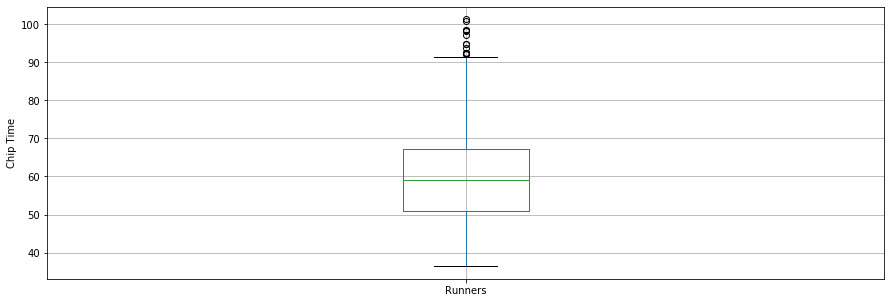

In [0]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

**Below is a distribution plot of runners' chip times plotted using the seaborn library. The distribution looks almost normal.**

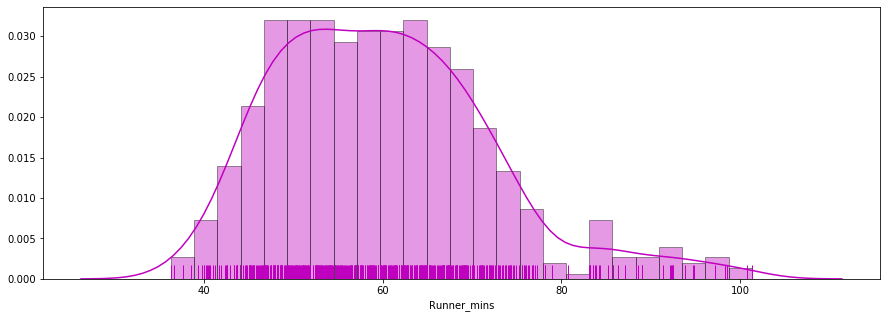

In [0]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=True, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

**Any performance differences between males and females of various age groups?**

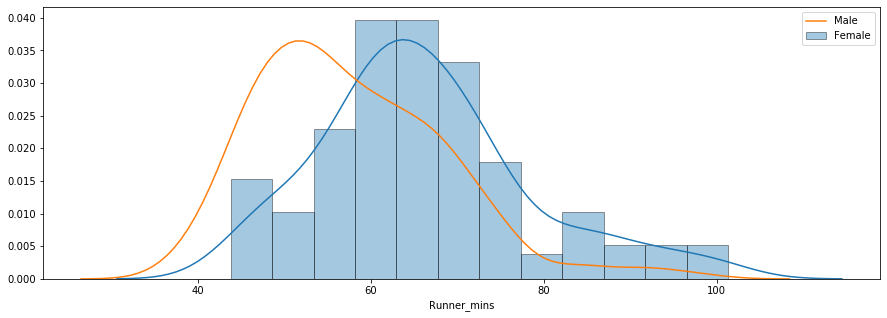

In [0]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

**The distribution indicates that females were slower than males on average. You can use the groupby() method to compute summary statistics for males and females separately as shown below.**

In [0]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


**Below is a side-by-side boxplot comparison of male and female finish times.**

Text(0.5, 0.98, '')

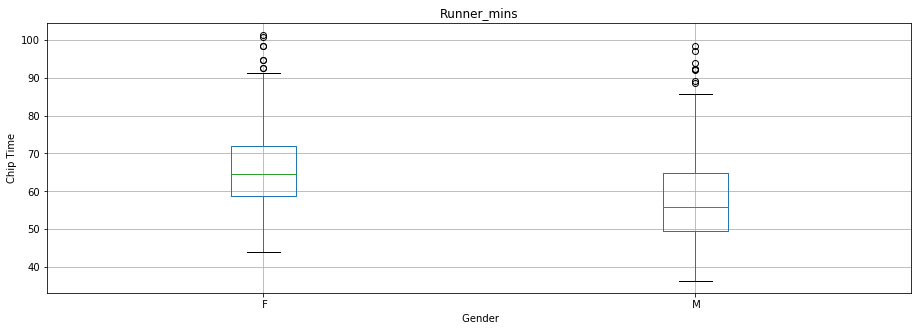

In [0]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")